In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings
from seaborn import color_palette 
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df_knn_graph = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

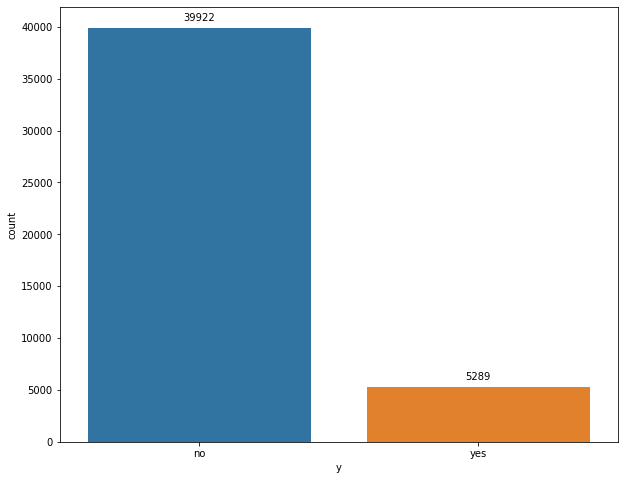

In [8]:
# Check for classes balance
plt.figure(figsize=(10, 8))
y_countplot = sns.countplot(x='y', data=df)
# To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582 
for y in y_countplot.patches:
    y_countplot.annotate(format(y.get_height()), (y.get_x() + y.get_width() / 2., y.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

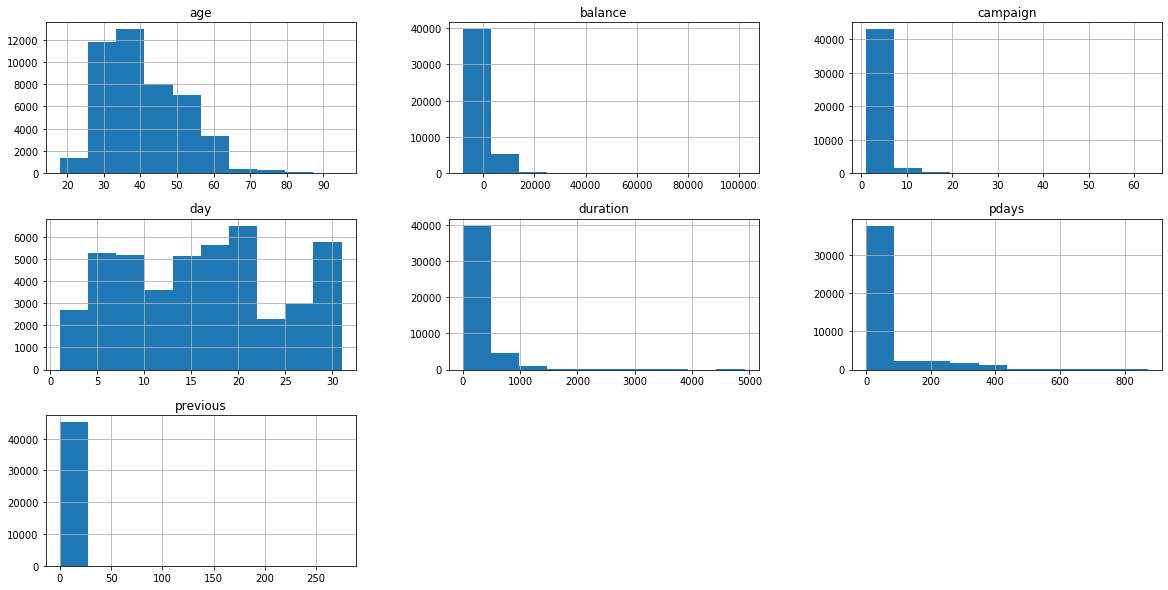

In [9]:
# Numerical features distributions
df.hist(figsize=(20, 10))
plt.show()

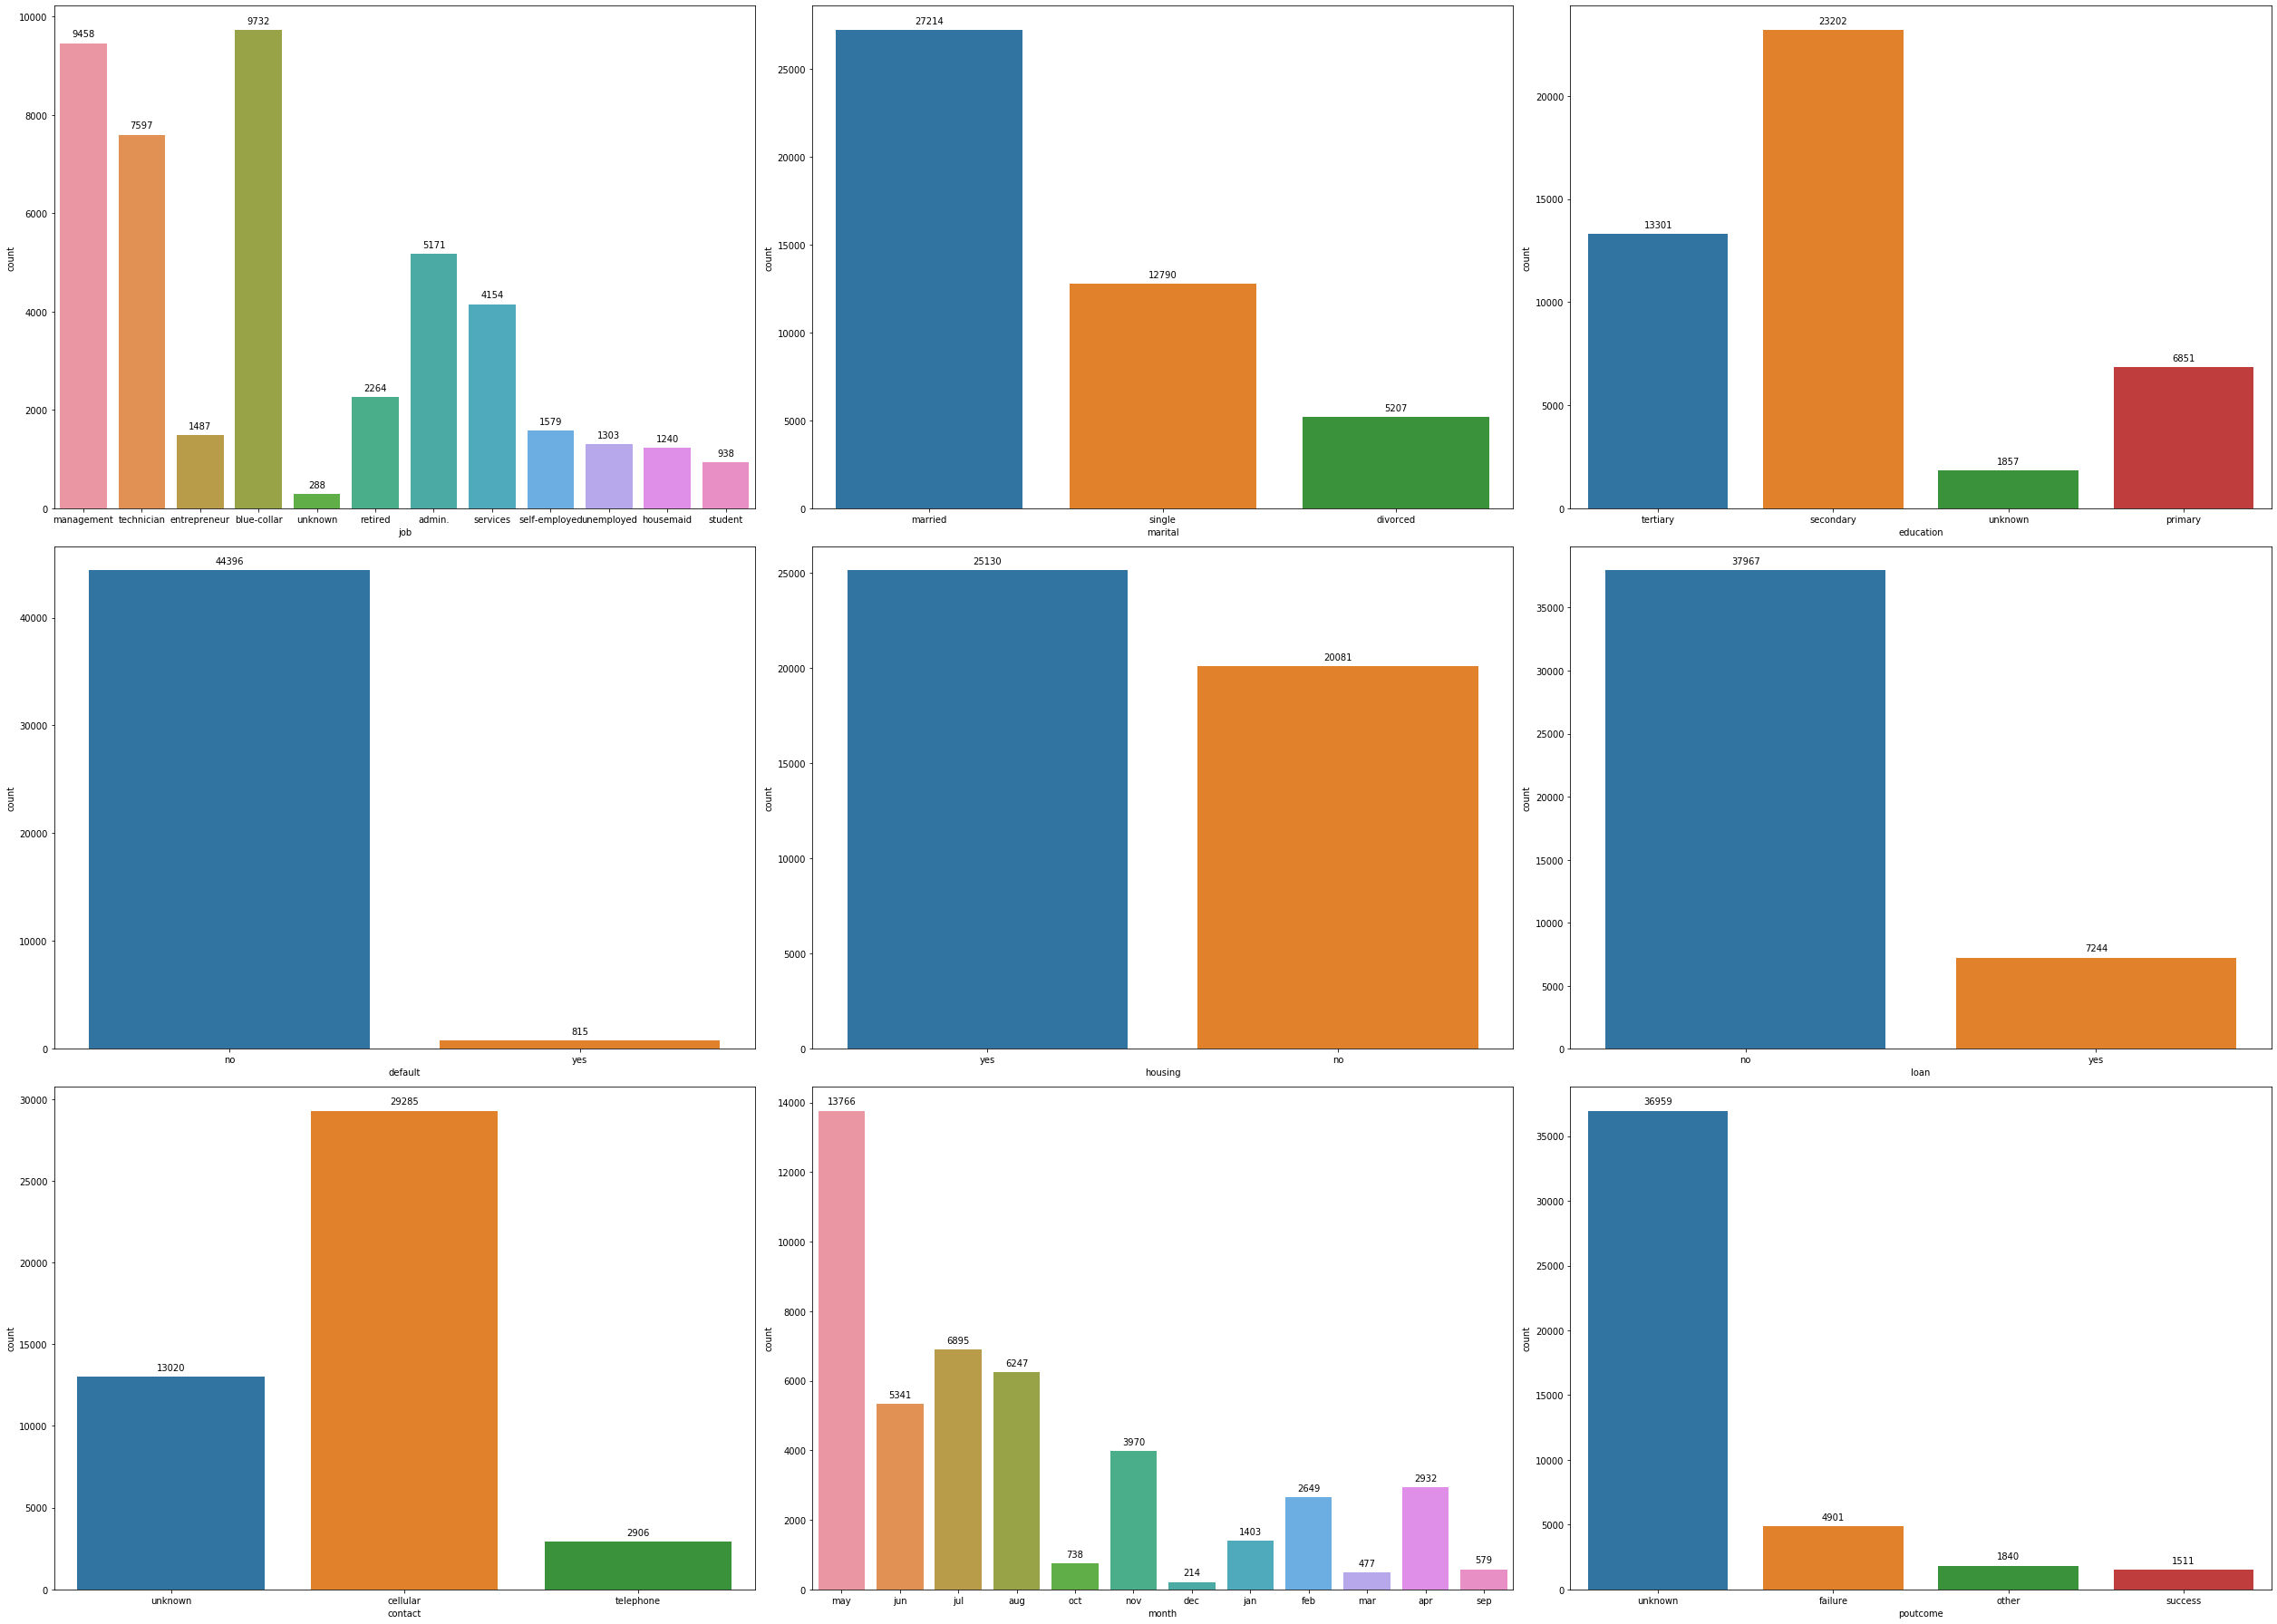

In [10]:
# Categorical features count
plt.figure(figsize=(35, 25))
j = 1
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    plt.subplot(3, 3, j)
    plot = sns.countplot(x=i, data=df)
    # To add annotation to counter plot https://github.com/mwaskom/seaborn/issues/1582 
    for z in plot.patches:
        plot.annotate(format(z.get_height()), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    j += 1
plt.tight_layout()

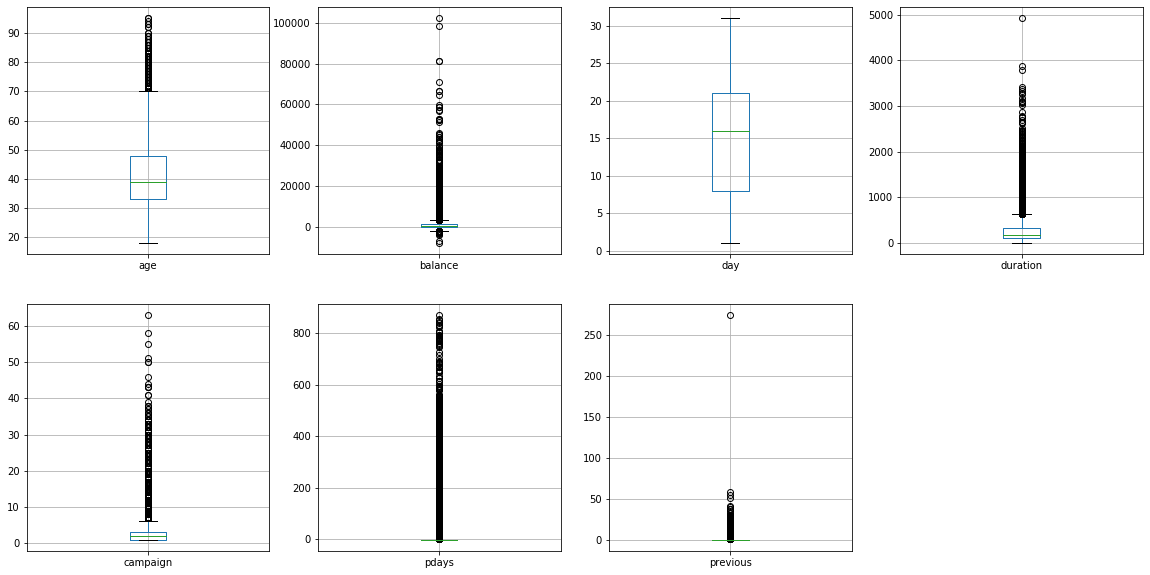

In [11]:
# Numerical feature boxplot
plt.figure(figsize=(20, 10))
j = 1
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    plt.subplot(2, 4, j)
    df.boxplot([i])
    j += 1
plt.show()

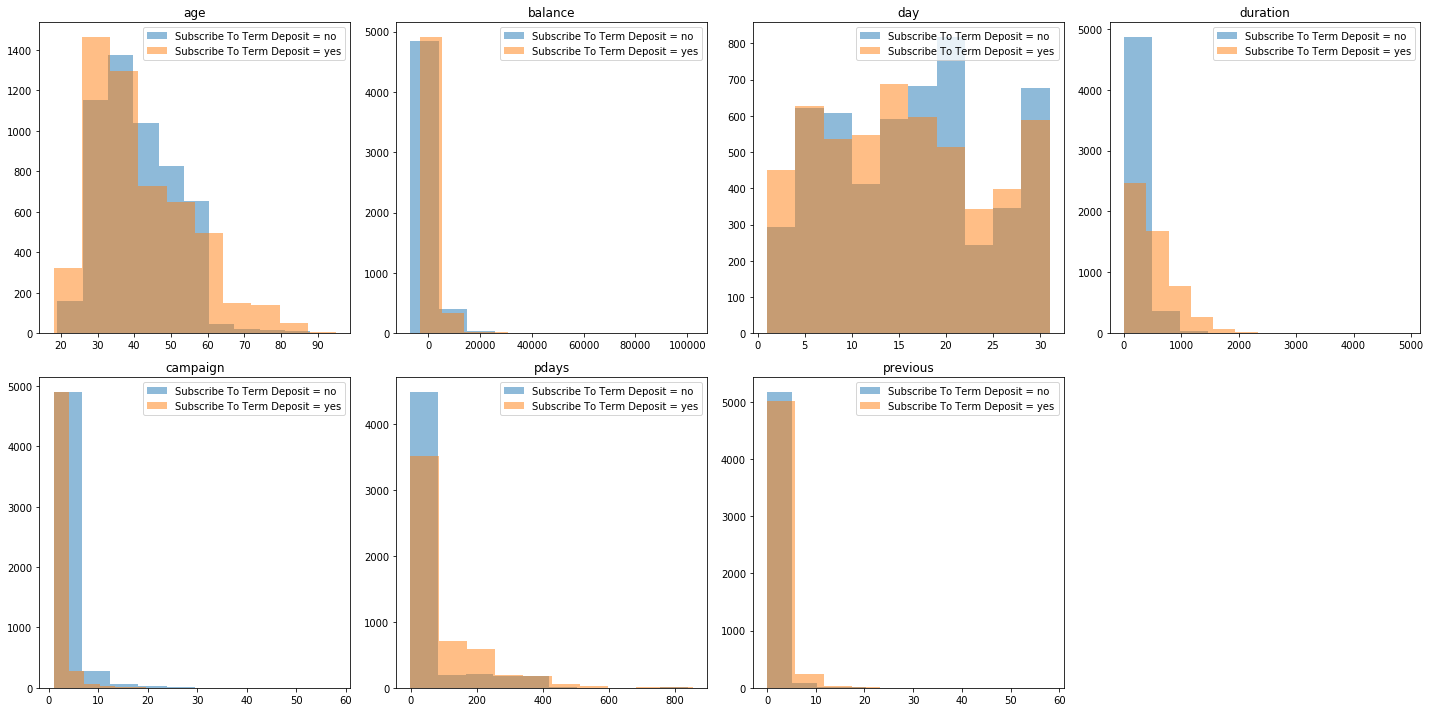

In [12]:
# Numerical Feature Distribution by y 
plt.figure(figsize=(20, 10))
j = 1
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    plt.subplot(2,4,j)
    plt.hist(df[df['y']=="no"][i].sample(frac=0.1325), alpha=0.5, label='Subscribe To Term Deposit = no')
    plt.hist(df[df['y']=="yes"][i], alpha=0.5, label='Subscribe To Term Deposit = yes')
    plt.legend(loc='upper right')
    plt.title(i)
    j += 1
plt.tight_layout()

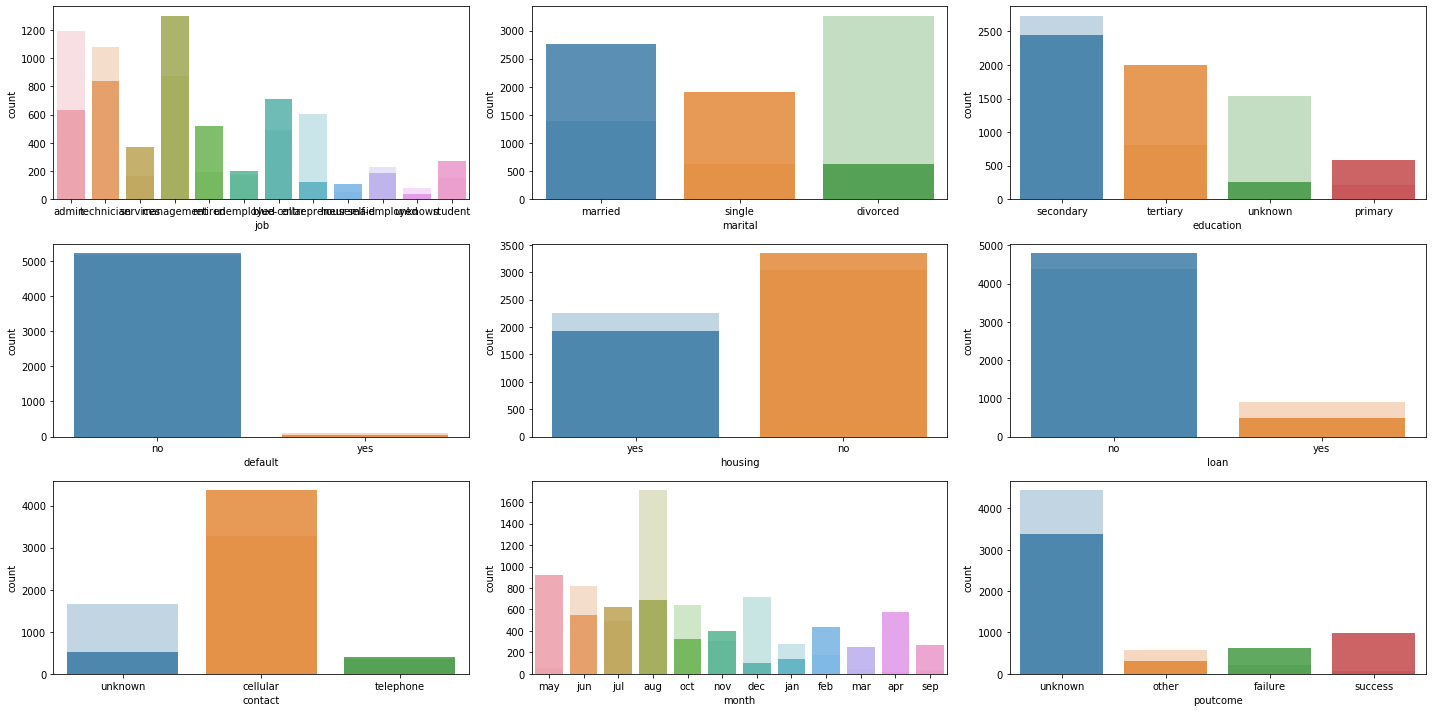

In [13]:
# Categorical features count, y = 0 sampled at 0.1325 (5289/39922 = 0.1325)
plt.figure(figsize=(20, 10))
j = 1
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    plt.subplot(3, 3, j)
    sns.countplot(x=i, data=df[df['y']=="no"].sample(frac=0.1325), alpha = 0.3)
    sns.countplot(x=i, data=df[df['y']=="yes"], alpha = 0.8)
    j += 1
plt.tight_layout()

# Data Preprocessing

In [14]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
# Delete day and duration
del df['day']
del df['duration']
del df['campaign']
del df['contact']
del df['month']
df.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,-1,0,unknown,no


In [16]:
# Convert binary columns Yes and No to 0 and 1
binary_col = ['default', 'housing', 'loan', 'y']
for i in binary_col:
    df[i+"_01"] = df.apply(lambda row:1 if row[i] == "yes" else 0, axis = 1)
    df_knn_graph[i+"_01"] = df.apply(lambda row:1 if row[i] == "yes" else 0, axis = 1)
    del df[i], df_knn_graph[i]
df.head()

,age,job,marital,education,balance,pdays,previous,poutcome,default_01,housing_01,loan_01,y_01
0,58,management,married,tertiary,2143,-1,0,unknown,0,1,0,0
1,44,technician,single,secondary,29,-1,0,unknown,0,1,0,0
2,33,entrepreneur,married,secondary,2,-1,0,unknown,0,1,1,0
3,47,blue-collar,married,unknown,1506,-1,0,unknown,0,1,0,0
4,33,unknown,single,unknown,1,-1,0,unknown,0,0,0,0


In [17]:
# One-Hot Encoding for Categorical variables
cat_col = ['job', 'marital', 'education', 'poutcome']
for i in cat_col:
    dummy = pd.get_dummies(df[i], prefix=i)
    df = df.join(dummy)
    del df[i]
df.head()

,age,balance,pdays,previous,default_01,housing_01,loan_01,y_01,job_admin.,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,-1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,44,29,-1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,33,2,-1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,47,1506,-1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,33,1,-1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [18]:
df.columns

Index(['age', 'balance', 'pdays', 'previous', 'default_01', 'housing_01',
       'loan_01', 'y_01', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [19]:
# Check if all col become “numeric”
df.describe()

,age,balance,pdays,previous,default_01,housing_01,loan_01,y_01,job_admin.,job_blue-collar,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,40.197828,0.580323,0.018027,0.555838,0.160226,0.116985,0.114375,0.215257,...,0.601933,0.282896,0.151534,0.513194,0.294198,0.041074,0.108403,0.040698,0.033421,0.817478
std,10.618762,3044.765829,100.128746,2.303441,0.133049,0.496878,0.366820,0.321406,0.318269,0.411005,...,0.489505,0.450411,0.358572,0.499831,0.455687,0.198464,0.310892,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# Binning 
# Age
age_bins = {"18-24": [18,24], "25-34": [25, 34], "35-44": [35,44], "45-64": [45,64], "65+": [65]}
for i in age_bins:
    if i == "65+":
        df["age_"+i] = df.apply(lambda row:1 if age_bins[i][0] <= row["age"] else 0, axis = 1)
    else:
        df["age_"+i] = df.apply(lambda row:1 if age_bins[i][0] <= row["age"] <= age_bins[i][1] else 0, axis = 1)
del df['age']

# Balance 
df["balance_<0"] = df.apply(lambda row:1 if row['balance'] < 0 else 0, axis = 1)
bal_pos_25 = np.percentile(df[df['balance'] >= 0]['balance'], 25, interpolation = 'midpoint')
bal_pos_50 = np.percentile(df[df['balance'] >= 0]['balance'], 50, interpolation = 'midpoint')
bal_pos_75 = np.percentile(df[df['balance'] >= 0]['balance'], 75, interpolation = 'midpoint')
bal_pos_100 = np.percentile(df[df['balance'] >= 0]['balance'], 100, interpolation = 'midpoint')
bal_bins = [-1, bal_pos_25, bal_pos_50, bal_pos_75, bal_pos_100]
for i in bal_bins:
    lower = bal_bins[bal_bins.index(i) - 1] + 1
    if i != -1:
        df["balance_" + str(int(lower)) + "-" + str(int(i))] = df.apply(lambda row:1 if lower <= row["balance"] <= i else 0, axis = 1)
del df['balance']
        
# Campaign
# for i in range(1,5):
#     if i == 4:
#         df["campaign_3+"] = df.apply(lambda row:1 if row["campaign"] > 3 else 0, axis = 1)
#     else:
#         df["campaign_"+str(i)] = df.apply(lambda row:1 if i == row["campaign"] else 0, axis = 1)
# del df['campaign']
        
# pdays:
pdays_bins = [-1, 180, 365, 366]
for i in pdays_bins:
    if i == -1:
        df['pdays_neverContacted'] = df.apply(lambda row:1 if row["pdays"] == -1 else 0, axis = 1)
    elif i == 366:
        df['pdays_365+'] = df.apply(lambda row:1 if row["pdays"] > 365 else 0, axis = 1)
    else:
        lower = pdays_bins[pdays_bins.index(i) - 1] + 1
        df['pdays' + str(lower) + "-" + str(i)] = df.apply(lambda row:1 if lower <= row["pdays"] <= i else 0, axis = 1)
del df['pdays']
        
# previous:
df['previous_01'] =  df.apply(lambda row:1 if row["previous"] > 0 else 0, axis = 1)
del df['previous']

# poutcome
df['poutcome_others'] = df.apply(lambda row:1 if row["poutcome_unknown"] == 1 or row['poutcome_other'] == 1 else 0, axis = 1)
del df['poutcome_unknown']
del df['poutcome_other']

df.head()

,default_01,housing_01,loan_01,y_01,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,balance_0-146,balance_147-542,balance_543-1596,balance_1597-102127,pdays_neverContacted,pdays0-180,pdays181-365,pdays_365+,previous_01,poutcome_others
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [21]:
for i in df.columns:
    print("{:<20}".format(i), Counter(df[i])[1])

default_01           815
housing_01           25130
loan_01              7244
y_01                 5289
job_admin.           5171
job_blue-collar      9732
job_entrepreneur     1487
job_housemaid        1240
job_management       9458
job_retired          2264
job_self-employed    1579
job_services         4154
job_student          938
job_technician       7597
job_unemployed       1303
job_unknown          288
marital_divorced     5207
marital_married      27214
marital_single       12790
education_primary    6851
education_secondary  23202
education_tertiary   13301
education_unknown    1857
poutcome_failure     4901
poutcome_success     1511
age_18-24            809
age_25-34            14204
age_35-44            14534
age_45-64            14854
age_65+              810
balance_<0           3766
balance_0-146        10371
balance_147-542      10355
balance_543-1596     10365
balance_1597-102127  10354
pdays_neverContacted 36954
pdays0-180           3198
pdays181-365         4416
pday

In [22]:
# Normalization using Min-max for Numerical Variables
# df.iloc[:, 0:6] = MinMaxScaler().fit_transform(df.iloc[:, 0:6])
# df.describe()

In [23]:
# Move y to the front 
col = df.columns.tolist()
df = df[[col[3]] + col[:3] + col[4:]]
df.head()

,y_01,default_01,housing_01,loan_01,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,balance_0-146,balance_147-542,balance_543-1596,balance_1597-102127,pdays_neverContacted,pdays0-180,pdays181-365,pdays_365+,previous_01,poutcome_others
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [24]:
# Create X and Y
X = df.drop('y_01', axis = 1)
Y = df['y_01']

# More EDA

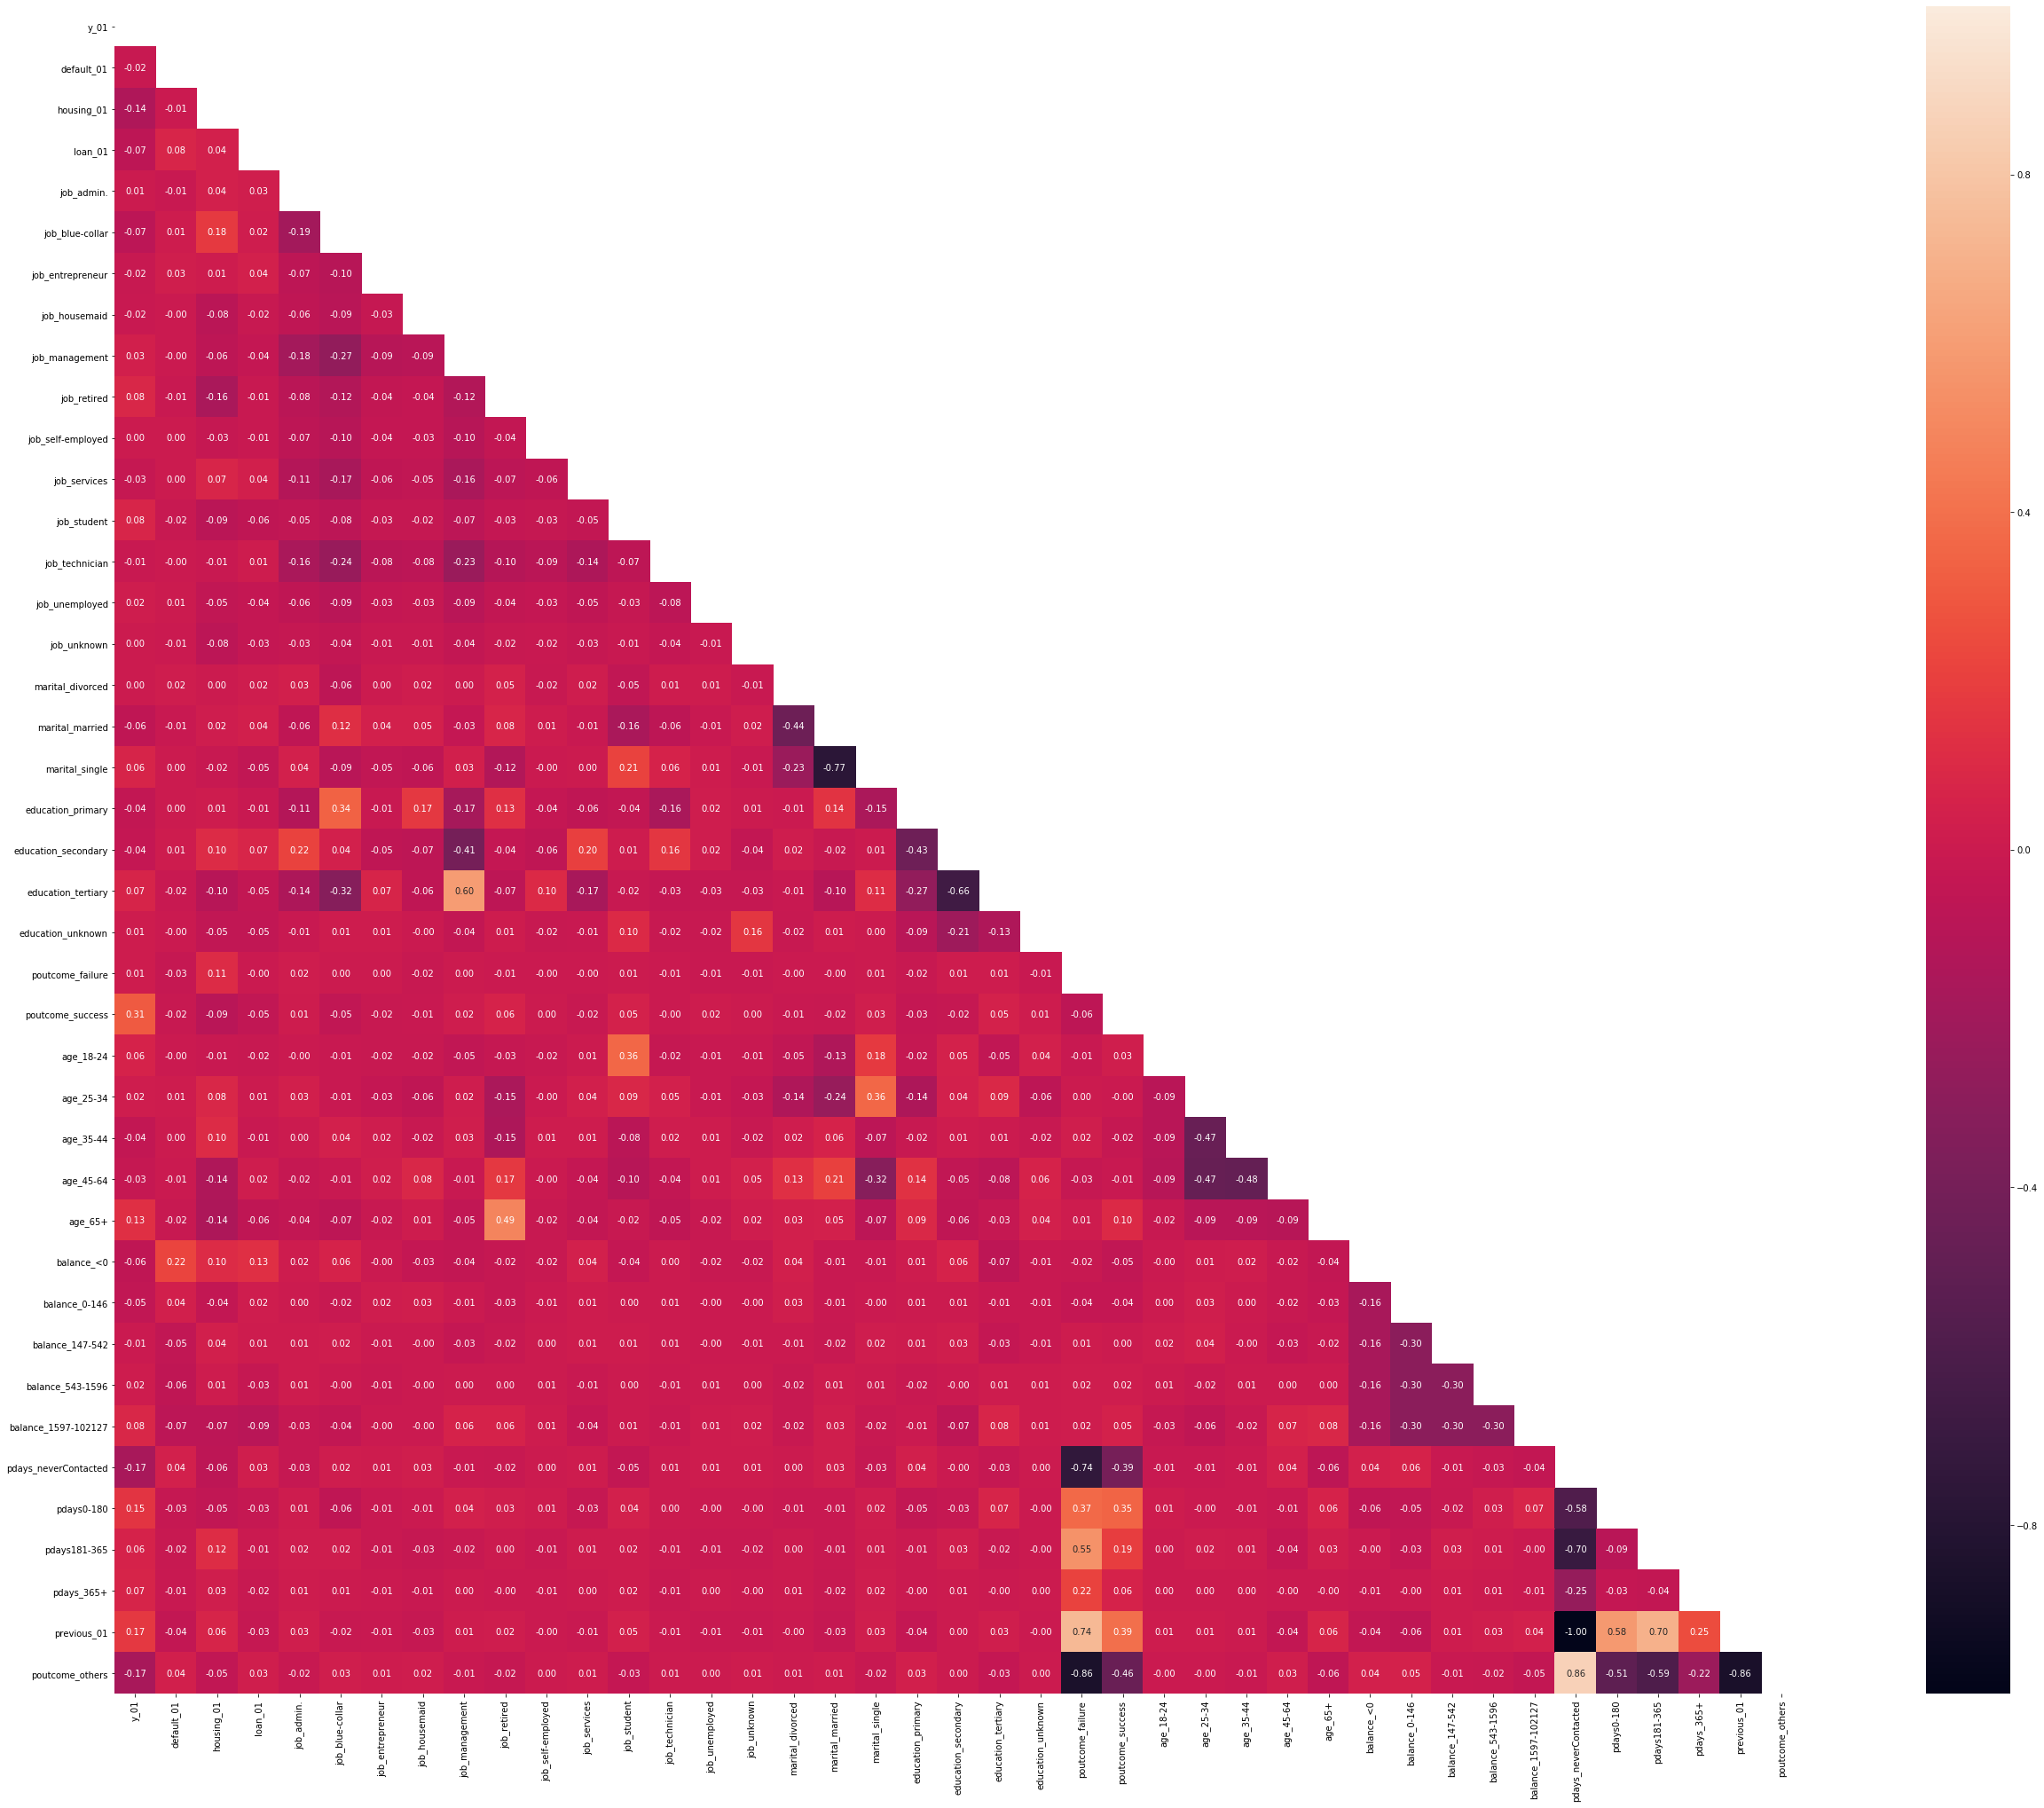

In [25]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,35))
sns.heatmap(corr, mask=mask, square=True, annot=True, annot_kws={"size": 10}, fmt='.2f')
plt.show()

In [26]:
abs(df.corr()["y_01"]).sort_values(ascending = False)

y_01                    1.000000
poutcome_success        0.306788
pdays_neverContacted    0.167263
previous_01             0.167263
poutcome_others         0.166863
pdays0-180              0.149480
housing_01              0.139173
age_65+                 0.127754
balance_1597-102127     0.080208
job_retired             0.079245
job_student             0.076897
job_blue-collar         0.072083
loan_01                 0.068185
education_tertiary      0.066448
pdays_365+              0.065548
marital_single          0.063526
pdays181-365            0.062449
marital_married         0.060260
age_18-24               0.058329
balance_<0              0.057421
balance_0-146           0.052583
age_35-44               0.043654
education_primary       0.040393
education_secondary     0.036388
job_management          0.032919
job_services            0.027864
age_45-64               0.025450
default_01              0.022419
job_unemployed          0.020390
job_entrepreneur        0.019662
age_25-34 

In [27]:
df.corr()["y_01"].sort_values(ascending = False)

y_01                    1.000000
poutcome_success        0.306788
previous_01             0.167263
pdays0-180              0.149480
age_65+                 0.127754
balance_1597-102127     0.080208
job_retired             0.079245
job_student             0.076897
education_tertiary      0.066448
pdays_365+              0.065548
marital_single          0.063526
pdays181-365            0.062449
age_18-24               0.058329
job_management          0.032919
job_unemployed          0.020390
age_25-34               0.016508
balance_543-1596        0.015300
education_unknown       0.012053
poutcome_failure        0.009885
job_admin.              0.005637
marital_divorced        0.002772
job_self-employed       0.000855
job_unknown             0.000267
balance_147-542        -0.005139
job_technician         -0.008970
job_housemaid          -0.015195
job_entrepreneur       -0.019662
default_01             -0.022419
age_45-64              -0.025450
job_services           -0.027864
education_

# Feature Engineering

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state = 42)

In [29]:
# Oversample by SMOTE
counter = Counter(y_train)
print("Before SMOTE Oversample:", counter)

X_train, y_train = SMOTE(random_state=42, k_neighbors = 5).fit_resample(X_train, y_train)

counter = Counter(y_train)
print("After SMOTE Oversample:",counter)

Before SMOTE Oversample: Counter({0: 31970, 1: 4198})
After SMOTE Oversample: Counter({0: 31970, 1: 31970})


In [30]:
# PCA
# pcol = PCA().fit(X_train)
# print(pcol.n_components_)
# np.cumsum(pcol.explained_variance_ratio_)

In [31]:
# Preserve at 98% Variance
# pcol = PCA(.98).fit(X_train)
# print(pcol.n_components_)
# np.cumsum(pcol.explained_variance_ratio_)

In [32]:
# X_train_pca = pcol.transform(X_train)
# X_test_pca = pcol.transform(X_test)

In [33]:
# pc_header = []
# for i in range(0,pcol.n_components_):
#     pc_header.append('PC'+str(i))
# pd.set_option("max_rows", None)
# loadings = pd.DataFrame(pcol.components_)[0:pcol.n_components_+1].T
# loadings.columns=pc_header
# loadings.index = df.iloc[:,1:].columns
# loadings

# Model

In [34]:
# Graph Confusion Matrix
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

## Decision Tree

PPT Notes:

1. Two base DT models: Entropy and Gini
2. Entropy: smaller depth & less leaves
3. Same root node: housing_01
4. Top root node: white => 50-50 cases 
5. Predicts both 0 and 1 class well
6. Accuracy and recall rate are high
7. Big tree ==> may involve overfitting issue

Based on our business question, we decided to use recall rate as evaluation metrics. The cost of the campaign is low, so it is okay to do the campaign for whom do not want to subscribe term deposit, but we don't want to miss any potential customers.

First, we perform two different versions of a decision tree using both entropy and gini measures. The model that uses gini measure has smaller depth and less leaves, but the root nodes are different which means that the variable which decreases the entropy most is not the variable that increases purity most. For both trees, the top root node is white which means that there are 50-50 percent split cases. The tree is pretty big, so it may involve some overfitting isssues.

The accuracy rate for both models is not that bad which is 74%, but the recall rate is pretty low. Both models did pretty well on predicting 0 class. Since we only oversample the training data set, so the model predicts class 1 not very well. We may fail to campaign some customers who are actually willing to subscribe a term deposit

### Baseline

Depth: 32
Leaves: 5015


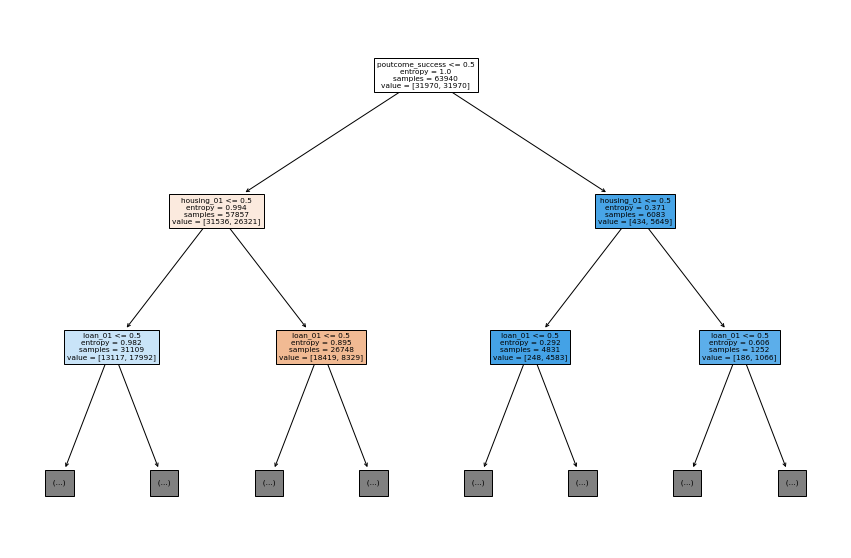

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Depth: "+ str(dt.tree_.max_depth)) #number of split levels
print("Leaves: "+ str(dt.tree_.n_leaves))

fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names = X_train.columns,filled=True, max_depth=2)
plt.show()

accuracy: 0.7551697445537985
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      7952
           1       0.23      0.43      0.30      1091

    accuracy                           0.76      9043
   macro avg       0.57      0.61      0.57      9043
weighted avg       0.83      0.76      0.78      9043



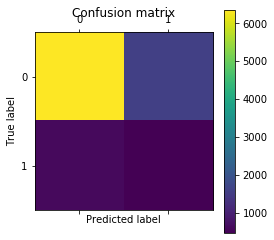

[[6363 1589]
 [ 625  466]]


In [36]:
print("accuracy: " + str(accuracy_score(y_test, dt_pred)))
print(classification_report(y_test, dt_pred))
create_cm(y_test, dt_pred)

Depth: 31
Leaves: 5118


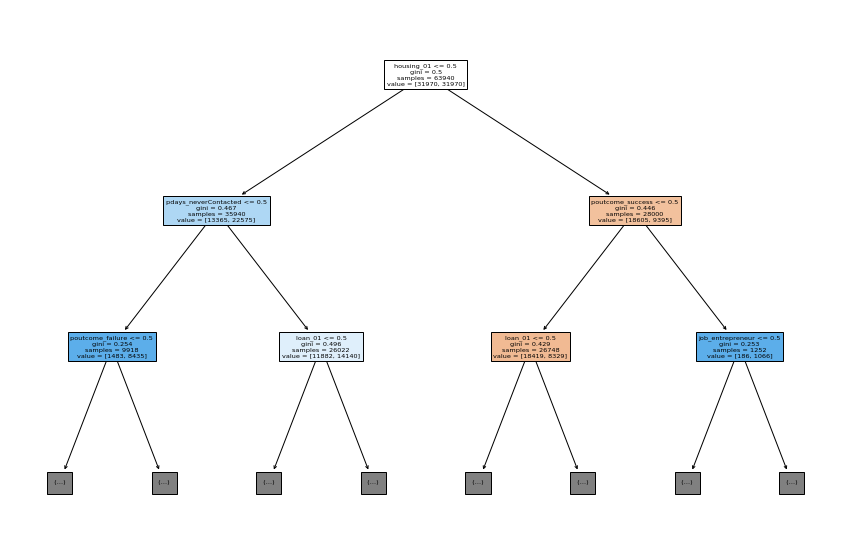

In [37]:
dt = DecisionTreeClassifier(criterion = "gini", random_state = 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Depth: "+ str(dt.tree_.max_depth)) #number of split levels
print("Leaves: "+ str(dt.tree_.n_leaves))

fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names = X_train.columns, filled=True, max_depth=2)
plt.show()

accuracy: 0.7561649894946367
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      7952
           1       0.23      0.42      0.30      1091

    accuracy                           0.76      9043
   macro avg       0.57      0.61      0.57      9043
weighted avg       0.83      0.76      0.79      9043



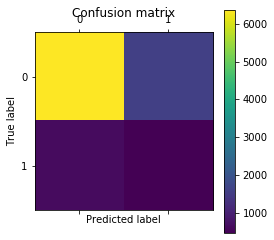

[[6375 1577]
 [ 628  463]]


In [38]:
print("accuracy: " + str(accuracy_score(y_test, dt_pred)))
print(classification_report(y_test, dt_pred))
create_cm(y_test, dt_pred)

### Pruning

#### First Attempt

PPT Notes:
1. min_impurity_decrease=0.005 and min_samples_split = 1000
2. Smaller trees: Depth: 9; Leaves: 15
3. Accuracy and recall rate decrease a lot
4. Predicts class 1 not so well
5. Miss some customers who are willing to subscribe a term deposit

Let's do some tree pruning. We first set the two parameters as you can see. The tree becomes much smaller, but the accuracy decreases and recall rate increases. We can find that the model still predicts class 1 not so well. So we might want tree to be not that small, and we try a different number for parameters. 

Depth: 5
Leaves: 7


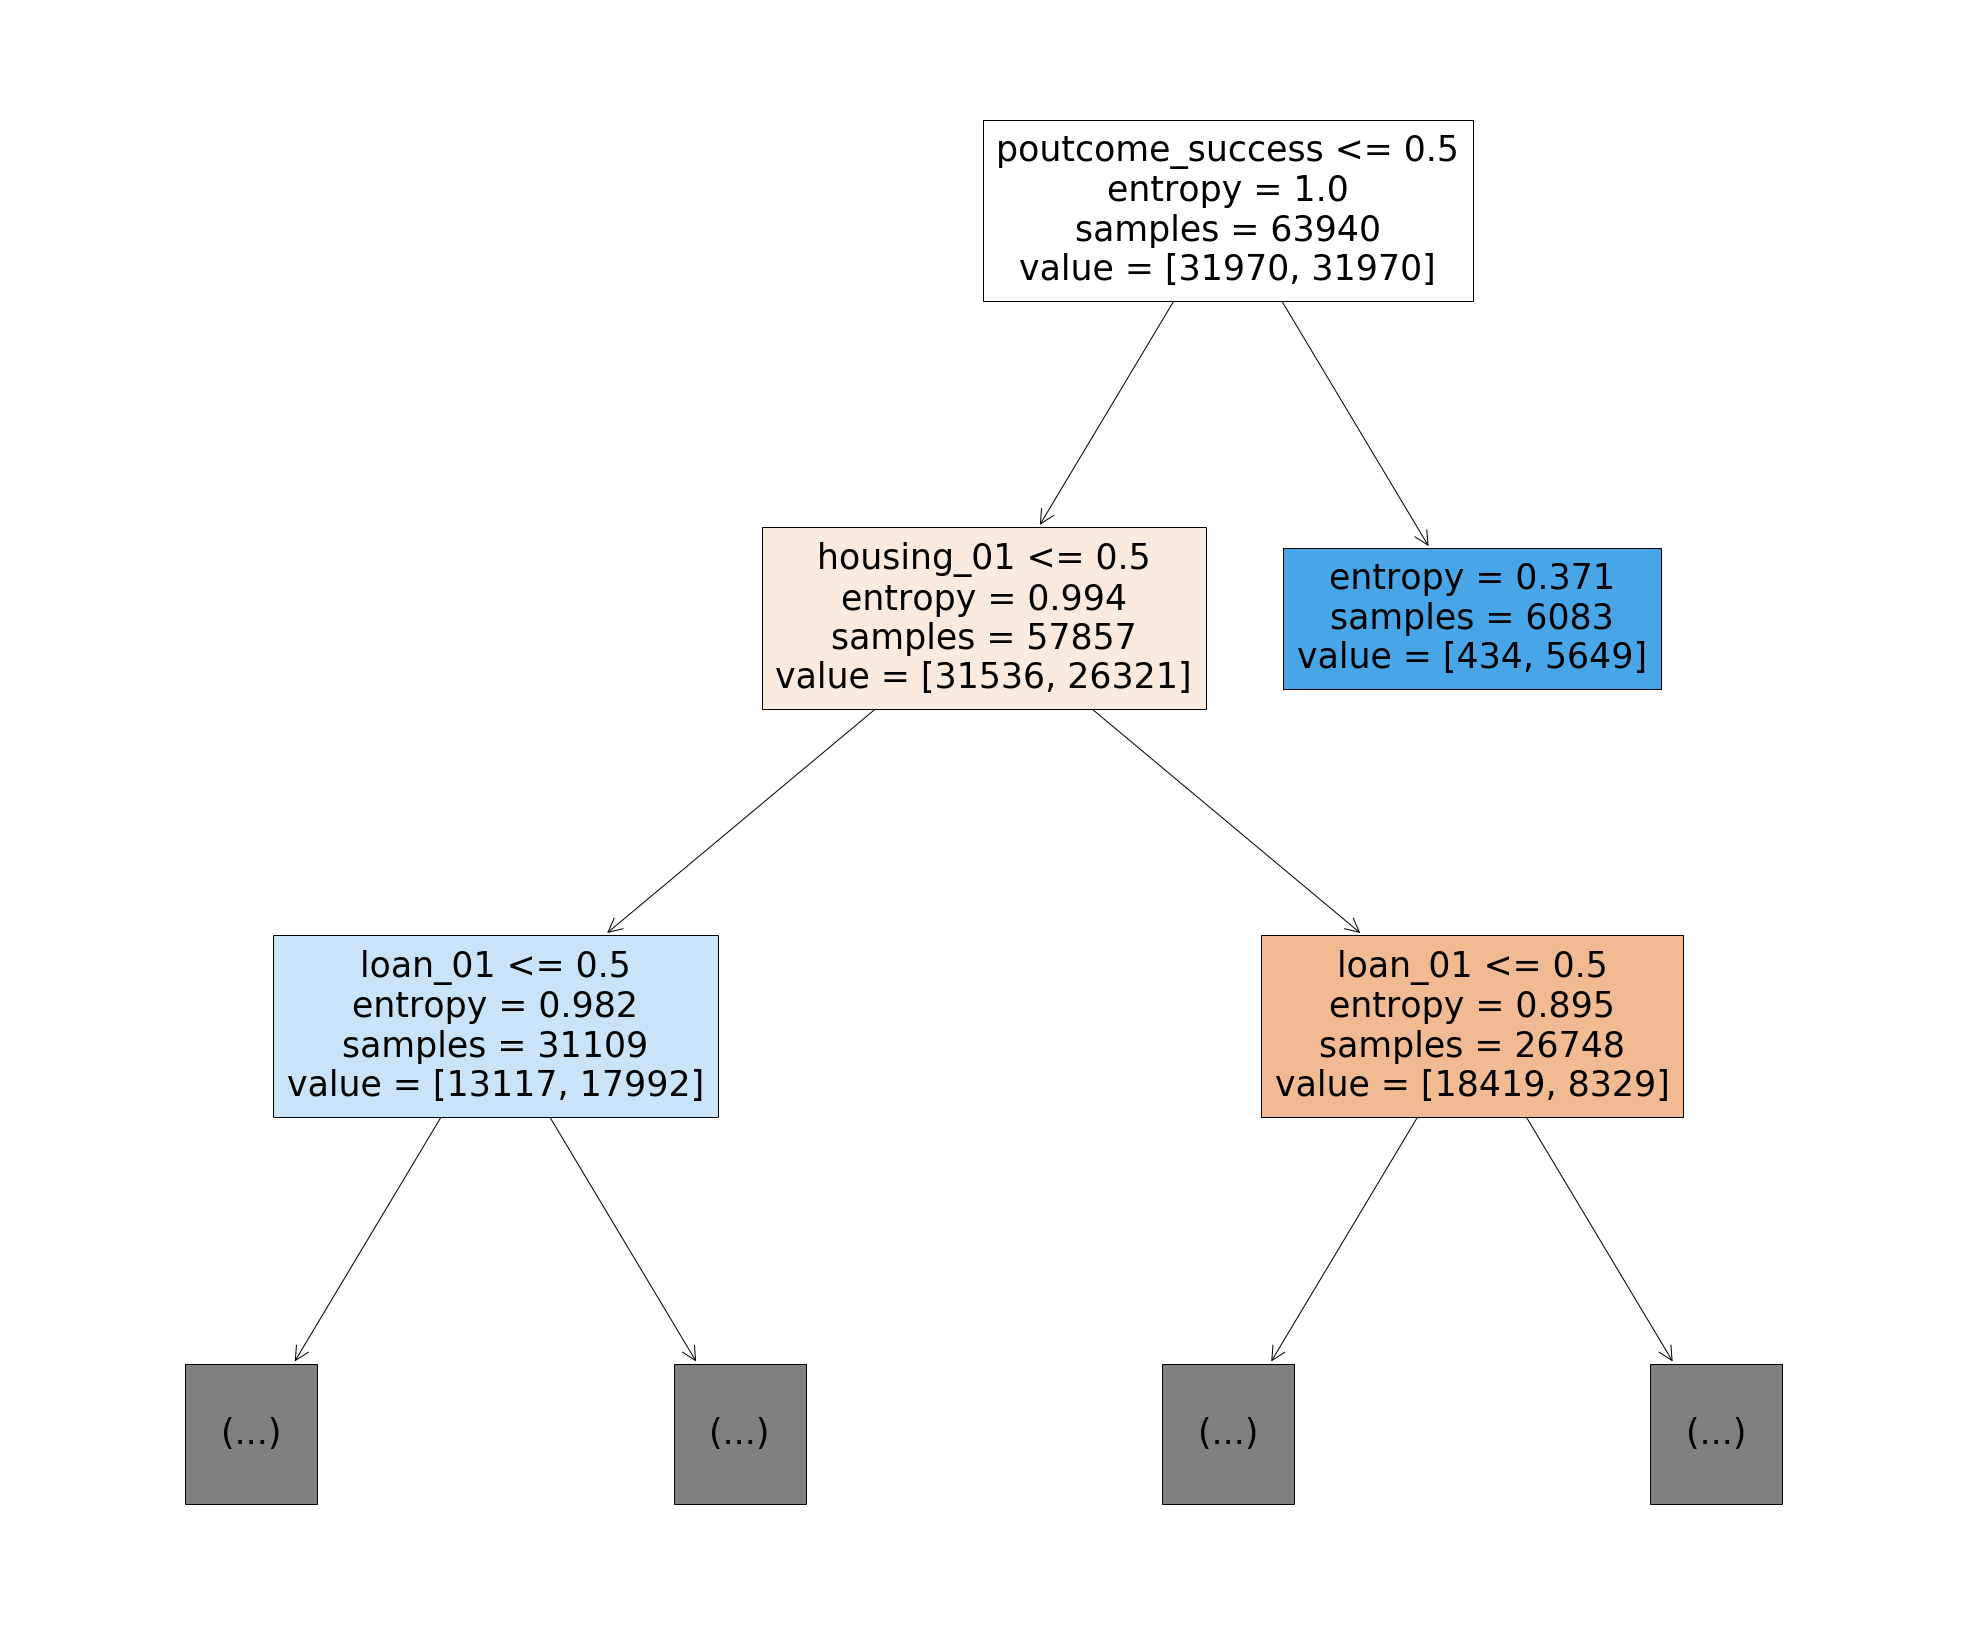

In [39]:
dt_m1 = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.005,min_samples_split = 1000,random_state = 42)
dt_m1.fit(X_train, y_train)
dt_m1_pred = dt_m1.predict(X_test)

print("Depth: "+ str(dt_m1.tree_.max_depth))
print("Leaves: "+ str(dt_m1.tree_.n_leaves))

fig = plt.figure(figsize=(35,30))
tree.plot_tree(dt_m1, feature_names = X_train.columns, filled=True, max_depth=2)
plt.show()

accuracy: 0.7067344907663387
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      7952
           1       0.22      0.57      0.32      1091

    accuracy                           0.71      9043
   macro avg       0.57      0.65      0.57      9043
weighted avg       0.84      0.71      0.75      9043



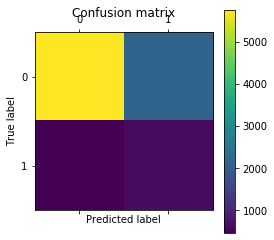

[[5769 2183]
 [ 469  622]]


In [40]:
print("accuracy: " + str(accuracy_score(y_test, dt_m1_pred)))
print(classification_report(y_test, dt_m1_pred))
create_cm(y_test, dt_m1_pred)

#### Second Attempt

PPT Notes:
1. min_impurity_decrease = 0.0008 and min_samples_split = 800
2. Bigger tree comparing to the first attempt: Depth: 16; Leaves: 63
3. Accuracy and recall rate increase
4. Predicts class 1 much better
5. Still worse than the model without pruning

In the second attempt, the tree becomes bigger, and the accuracy is approxiamtely similar but recall rate increases a little. The model predicts class 1 better. It gives fewer false negative cases but more true positive cases. Now we perform Random Forest. 

Depth: 11
Leaves: 26


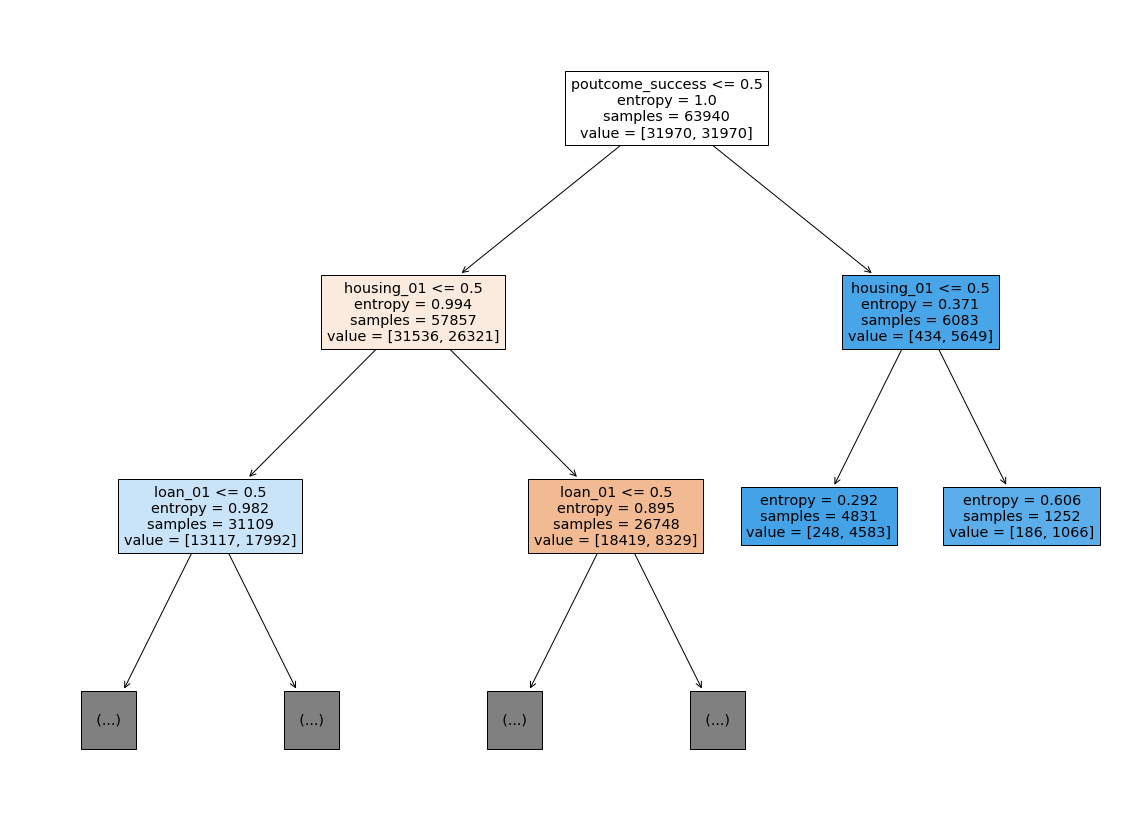

In [41]:
dt_m2 = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.0008, min_samples_split = 800, random_state = 42)
dt_m2.fit(X_train, y_train)
dt_m2_pred = dt_m2.predict(X_test)

print("Depth: "+ str(dt_m2.tree_.max_depth))
print("Leaves: "+ str(dt_m2.tree_.n_leaves))

fig = plt.figure(figsize=(20,15))
tree.plot_tree(dt_m2, feature_names = X_train.columns, filled=True, max_depth=2)
plt.show()

accuracy: 0.7207785027092779
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      7952
           1       0.23      0.57      0.33      1091

    accuracy                           0.72      9043
   macro avg       0.58      0.66      0.58      9043
weighted avg       0.84      0.72      0.76      9043



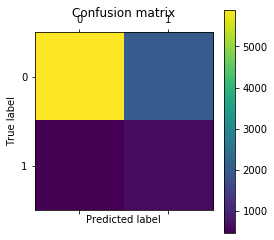

[[5896 2056]
 [ 469  622]]


In [42]:
print("accuracy: " + str(accuracy_score(y_test, dt_m2_pred)))
print(classification_report(y_test, dt_m2_pred))
create_cm(y_test, dt_m2_pred)

## Random Forest

PPT Notes:

1. Random Forest Model: n_estimators=500
2. Higher accuracy and recall rate
3. When doing the market campaign, we won't miss many customers who do subscribe the term deposit.
4. Variable of greatest importance: housing_01
5. n_estimator = 100 is a little bit worse.  

The random forest model with n_estimators=500 gives a little higher accuracy but lower recall rate. Lets' see the influence bar chart. We can see that the top 2 variables that have largest importance are housing_01 and loan_01. This pretty makes sense because people who have personal or housing loan largely affects whether they want to subscribe the term deposit.

accuracy: 0.7535110029857348
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      7952
           1       0.23      0.46      0.31      1091

    accuracy                           0.75      9043
   macro avg       0.57      0.63      0.58      9043
weighted avg       0.83      0.75      0.78      9043



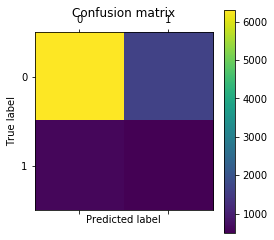

[[6315 1637]
 [ 592  499]]


In [43]:
rf1 = RandomForestClassifier(random_state = 42, n_estimators=100)
rf1.fit(X_train, y_train)
rf1_pred = rf1.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, rf1_pred)))
print(classification_report(y_test, rf1_pred))
create_cm(y_test, rf1_pred)

In [44]:
influence = pd.Series(rf1.feature_importances_, index = X.columns)
influence.sort_values(inplace = True, ascending = False)
print(influence)

housing_01              0.113000
loan_01                 0.052212
poutcome_success        0.051268
job_technician          0.033394
poutcome_others         0.032290
balance_0-146           0.031478
balance_147-542         0.030252
job_management          0.030143
balance_543-1596        0.030110
age_35-44               0.029632
education_secondary     0.029432
marital_married         0.028600
job_blue-collar         0.028515
age_45-64               0.028414
age_25-34               0.028130
poutcome_failure        0.027972
balance_1597-102127     0.027332
job_admin.              0.026851
pdays_neverContacted    0.026643
education_tertiary      0.023881
marital_single          0.023694
job_services            0.022989
balance_<0              0.022848
marital_divorced        0.022041
previous_01             0.021232
education_primary       0.020433
job_self-employed       0.016451
age_65+                 0.016307
education_unknown       0.014462
job_unemployed          0.014382
job_entrep

accuracy: 0.7520734269600796
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      7952
           1       0.23      0.47      0.31      1091

    accuracy                           0.75      9043
   macro avg       0.57      0.63      0.58      9043
weighted avg       0.83      0.75      0.78      9043



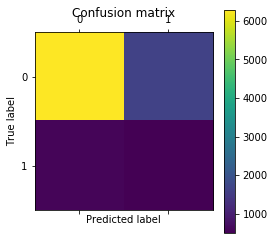

[[6293 1659]
 [ 583  508]]


In [45]:
rf2 = RandomForestClassifier(random_state = 42, n_estimators=500)
rf2.fit(X_train, y_train)
rf2_pred = rf2.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, rf2_pred)))
print(classification_report(y_test, rf2_pred))
create_cm(y_test, rf2_pred)

In [46]:
influence = pd.Series(rf2.feature_importances_, index = X.columns)
influence.sort_values(inplace = True, ascending = False)
print(influence)

housing_01              0.113814
loan_01                 0.052740
poutcome_success        0.048314
poutcome_others         0.033817
job_technician          0.032719
balance_0-146           0.031745
balance_147-542         0.030501
balance_543-1596        0.030392
job_management          0.030131
education_secondary     0.029570
age_35-44               0.029563
job_blue-collar         0.028784
age_45-64               0.028594
marital_married         0.028215
age_25-34               0.027920
poutcome_failure        0.027733
balance_1597-102127     0.027610
job_admin.              0.027072
pdays_neverContacted    0.026829
marital_single          0.023893
education_tertiary      0.023425
job_services            0.023043
balance_<0              0.022668
marital_divorced        0.021832
previous_01             0.020992
education_primary       0.019887
job_self-employed       0.016828
age_65+                 0.014815
education_unknown       0.014535
job_entrepreneur        0.014287
job_unempl

## KNN

accuracy: 0.6483467875704965
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      7952
           1       0.20      0.66      0.31      1091

    accuracy                           0.65      9043
   macro avg       0.57      0.66      0.54      9043
weighted avg       0.85      0.65      0.71      9043



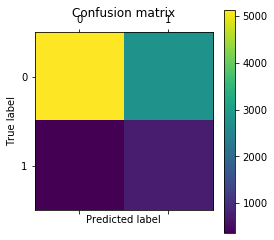

[[5138 2814]
 [ 366  725]]


In [47]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)
df_knn_n = KNeighborsClassifier(n_neighbors = 213) #213=sqrt(45211)
df_knn_n.fit(X_train, y_train)
knn_n_pred = df_knn_n.predict(X_test)
print("accuracy: " + str(accuracy_score(y_test, knn_n_pred)))
print(classification_report(y_test, knn_n_pred))
create_cm(y_test, knn_n_pred)

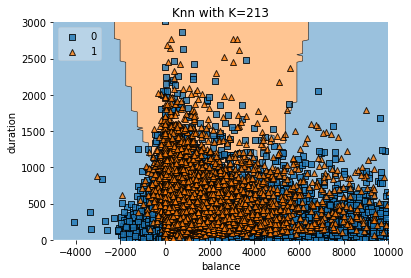

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k):
    x = data[['balance','duration']].values
    y = data['y_01'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('balance')
    plt.ylabel('duration')
    plt.title('Knn with K='+ str(k))
    plt.xlim([-5000, 10000])
    plt.ylim([0, 3000])
    plt.show()

knn_comparison(df_knn_graph, 213) 

# Code borrowed from https://towardsdatascience.com/knn-visualization-in-just-13-lines-of-code-32820d72c6b6

## Logistics Regression

                            OLS Regression Results                            
Dep. Variable:                   y_01   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     929.3
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        19:56:38   Log-Likelihood:                -31748.
No. Observations:               63940   AIC:                         6.358e+04
Df Residuals:                   63899   BIC:                         6.395e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8505 

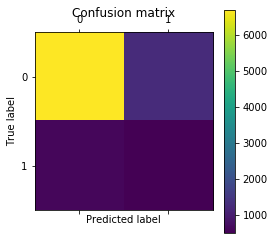

[[6692 1260]
 [ 599  492]]


In [49]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
x2 = sm.add_constant(X_train)
models = sm.OLS(y_train,x2)
result = models.fit()

logreg = LogisticRegression(C=1e9, max_iter=200)
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)

print(result.summary())
print((np.exp(result.params)).sort_values(ascending=False))
print("accuracy: " + str(accuracy_score(y_test, log_pred)))
print(classification_report(y_test, log_pred))
create_cm(y_test, log_pred)

## NB

accuracy of NB: 0.7297357071768219
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      7952
           1       0.24      0.56      0.33      1091

    accuracy                           0.73      9043
   macro avg       0.58      0.66      0.58      9043
weighted avg       0.84      0.73      0.77      9043



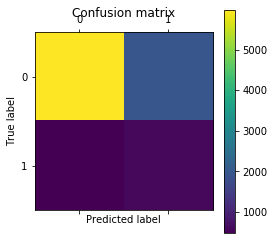

[[5991 1961]
 [ 483  608]]


In [50]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
NB_pred=NB.predict(X_test)
print("accuracy of NB: " + str(accuracy_score(y_test, NB_pred)))
print(classification_report(y_test, NB_pred))
create_cm(y_test, NB_pred)

accuracy of GNB: 0.7214419993365033
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      7952
           1       0.23      0.55      0.32      1091

    accuracy                           0.72      9043
   macro avg       0.58      0.65      0.57      9043
weighted avg       0.84      0.72      0.76      9043



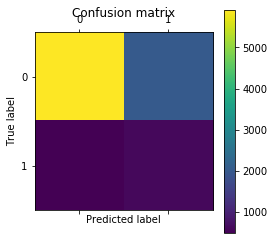

[[5921 2031]
 [ 488  603]]


In [51]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred=GNB.predict(X_test)
print("accuracy of GNB: " + str(accuracy_score(y_test, GNB_pred)))
print(classification_report(y_test, GNB_pred))
create_cm(y_test, GNB_pred)

accuracy of CB: 0.7365918389914852
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      7952
           1       0.24      0.53      0.33      1091

    accuracy                           0.74      9043
   macro avg       0.58      0.65      0.58      9043
weighted avg       0.84      0.74      0.77      9043



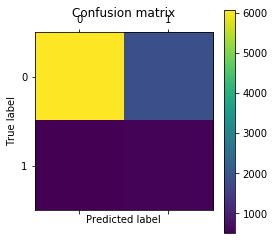

[[6086 1866]
 [ 516  575]]


In [52]:
CB = CategoricalNB()
CB.fit(X_train, y_train)
CB_pred=CB.predict(X_test)
print("accuracy of CB: " + str(accuracy_score(y_test, CB_pred)))
print(classification_report(y_test, CB_pred))
create_cm(y_test, CB_pred)

NBboost: 0.7187880128276014
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      7952
           1       0.24      0.60      0.34      1091

    accuracy                           0.72      9043
   macro avg       0.58      0.67      0.58      9043
weighted avg       0.85      0.72      0.76      9043



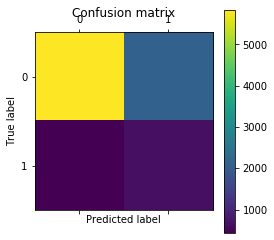

[[5845 2107]
 [ 436  655]]


In [53]:
from sklearn.ensemble import AdaBoostClassifier
NBboost = AdaBoostClassifier(
    MultinomialNB(),
    n_estimators=300)
NBboost.fit(X_train, y_train)
NBboost_pred = NBboost.predict(X_test)
print("NBboost: " + str(accuracy_score(y_test,NBboost_pred)))
print(classification_report(y_test,NBboost_pred))
create_cm(y_test,NBboost_pred)

OOB 0.6680638098217079
NBboost: 0.7294039588632091
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      7952
           1       0.24      0.56      0.33      1091

    accuracy                           0.73      9043
   macro avg       0.58      0.66      0.58      9043
weighted avg       0.84      0.73      0.77      9043



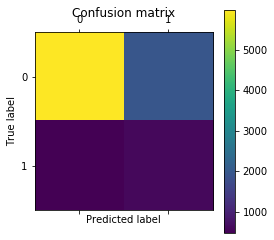

[[5987 1965]
 [ 482  609]]


In [54]:
from sklearn.ensemble import BaggingClassifier
NBbag = BaggingClassifier(n_estimators=100, base_estimator=NB, oob_score=True, random_state=0)
NBbag.fit(X_train,y_train)    
print('OOB', NBbag.oob_score_) # uses information from only 1 bag

NBbag_pred=NBbag.predict(X_test)
print("NBboost: " + str(accuracy_score(y_test,NBbag_pred)))
print(classification_report(y_test,NBbag_pred))
create_cm(y_test,NBbag_pred)